In [24]:
import subprocess
import shlex
import os
import pandas as pd

In [25]:
# CPU_NUMBER 0-3 efficiency core(icestorm), 4-7 performance core(firestorm)
CPU_NUMBER = 7 # performance

In [26]:
import subprocess
import shlex
import os

code = """
	.arch armv8-a
	.file	"mispred_test.c"
	.text
	.global	a
	.bss
	.align	3
	.type	a, %object
	.size	a, 8000
a:
	.zero	8000
	.text
	.align	2
	.global	get_pc
	.type	get_pc, %function
get_pc:
.LFB6:
	.cfi_startproc
	stp	x29, x30, [sp, -16]!
	.cfi_def_cfa_offset 16
	.cfi_offset 29, -16
	.cfi_offset 30, -8
	mov	x29, sp
	mov	x0, x30
	mov	x30, x0
	hint	7 // xpaclri
	mov	x0, x30
	ldp	x29, x30, [sp], 16
	.cfi_restore 30
	.cfi_restore 29
	.cfi_def_cfa_offset 0
	ret
	.cfi_endproc
.LFE6:
	.size	get_pc, .-get_pc
	.align	2
	.global	genRand
	.type	genRand, %function
genRand:
.LFB7:
	.cfi_startproc
	stp	x29, x30, [sp, -32]!
	.cfi_def_cfa_offset 32
	.cfi_offset 29, -32
	.cfi_offset 30, -24
	mov	x29, sp
	mov	x0, 0
	bl	time
	bl	srand
	str	wzr, [sp, 28]
	b	.L4
.L5:
	bl	rand
	cmp	w0, 0
	and	w0, w0, 1
	csneg	w2, w0, w0, ge
	adrp	x0, a
	add	x0, x0, :lo12:a
	ldrsw	x1, [sp, 28]
	str	w2, [x0, x1, lsl 2]
	ldr	w0, [sp, 28]
	add	w0, w0, 1
	str	w0, [sp, 28]
.L4:
	ldr	w0, [sp, 28]
	cmp	w0, 1999
	ble	.L5
	nop
	nop
	ldp	x29, x30, [sp], 32
	.cfi_restore 30
	.cfi_restore 29
	.cfi_def_cfa_offset 0
	ret
	.cfi_endproc
.LFE7:
	.size	genRand, .-genRand
	.section	.rodata
	.align	3
.LC0:
	.string	"sched_setaffinity([0])"
	.align	3
.LC1:
	.string	"python3 -c 'import math'"
	.align	3
.LC2:
	.string	"%5.3f\\n"
	.text
	.align	2
	.global	main
	.type	main, %function

.altmacro
.macro dummy_branches1 iter, n, i
	b label1_\iter
	.p2align \i
label1_\iter:
	.if \\n-\iter
		dummy_branches1 %iter+1, \\n, \i
	.endif
.endm

.altmacro
.macro dummy_branches2 iter, n, i
	b label2_\iter
	.p2align \i
label2_\iter:
	.if \\n-\iter
		dummy_branches2 %iter+1, \\n, \i
	.endif
.endm

.altmacro
.macro snop n, i
	nop
	.p2align \\n
	.if \\n-\i
		snop %n-1, \i
	.endif
.endm

main:
.LFB8:
	.cfi_startproc
	mov	x12, 32224
	sub	sp, sp, x12
	.cfi_def_cfa_offset 32224
	stp	x29, x30, [sp]
	.cfi_offset 29, -32224
	.cfi_offset 30, -32216
	mov	x29, sp
	adrp	x0, :got:__stack_chk_guard
	ldr	x0, [x0, :got_lo12:__stack_chk_guard]
	ldr	x1, [x0]
	str	x1, [sp, 32216]
	mov	x1, 0
	mov	w0, {cpu_number}	// cpu
	str	w0, [sp, 32]
	add	x0, sp, 216
	movi	v0.4s, 0
	stp	q0, q0, [x0]
	stp	q0, q0, [x0, 32]
	stp	q0, q0, [x0, 64]
	stp	q0, q0, [x0, 96]
	ldrsw	x0, [sp, 32]
	str	x0, [sp, 72]
	ldr	x0, [sp, 72]
	cmp	x0, 1023
	bhi	.L8
	ldr	x0, [sp, 72]
	lsr	x0, x0, 6
	lsl	x1, x0, 3
	add	x2, sp, 216
	add	x1, x2, x1
	ldr	x2, [x1]
	ldr	x1, [sp, 72]
	and	w1, w1, 63
	mov	x3, 1
	lsl	x1, x3, x1
	lsl	x0, x0, 3
	add	x3, sp, 216
	add	x0, x3, x0
	orr	x1, x2, x1
	str	x1, [x0]
.L8:
	add	x0, sp, 216
	mov	x2, x0
	mov	x1, 128
	mov	w0, 0
	bl	sched_setaffinity
	str	w0, [sp, 36]
	ldr	w0, [sp, 36]
	cmn	w0, #1
	bne	.L9
	adrp	x0, .LC0
	add	x0, x0, :lo12:.LC0
	bl	perror
	mov	w0, -1
	bl	exit
.L9:
	adrp	x0, .LC1
	add	x0, x0, :lo12:.LC1
	bl	system
	str	w0, [sp, 40]
	add	x0, sp, 120
	mov	x2, 96
	mov	w1, 0
	bl	memset
	add	x0, sp, 120
	bl	perf_open
	str	xzr, [sp, 56]
	str	xzr, [sp, 80]
	str	xzr, [sp, 88]
	str	wzr, [sp, 44]
	bl	get_pc
	add x0, x0, 8
	str	x0, [sp, 96] 
	add	x0, sp, 216 // [sp, 96] is here
	mov	x1, 32000
	mov	x2, x1
	mov	w1, 0
	bl	memset
	str	wzr, [sp, 28]
	bl	get_pc
	add x0, x0, 8
	str	x0, [sp, 104]
	str	xzr, [sp, 88] // [sp, 104] is here
	bl	genRand
	str	xzr, [sp, 56]
	add	x0, sp, 120
	bl	perf_start

	adrp	x0, a
	add	x0, x0, :lo12:a
	ldrsw	x1, [sp, 28]
	ldr	w0, [x0, x1, lsl 2]
	str	w0, [sp, 52]
	
	ldr	x0, [sp, 56]
	add x0, x0, 2
	str	x0, [sp, 56]

	ldr	w0, [sp, 52]
	add w0, w0, 1
	str	w0, [sp, 52] // rand is 1 or 2

	mov	w0, 120
	b .L30
	.p2align 12
.L30:
	sub	w0, w0, 1
	.p2align 7
	cbnz w0, .L30

	mov x0, 0x300000000
	mov x1, 0x000000000
	add x0, x0, x1
	adr x1, .L20
	.p2align 6
	br x0

	.p2align 11
.L20:
	ldr	x0, [sp, 56]
	.p2align 2	
	cbz x0, .L11	// co_b to check
	ldr	x0, [sp, 80]
	add	x0, x0, 1
	str	x0, [sp, 80]
	.p2align 2	
.L11:
	add	x1, sp, 216
	ldrsw	x0, [sp, 28]
	lsl	x0, x0, 5
	add	x1, x1, x0
	add	x0, sp, 120
	bl	perf_stop
	ldr	w0, [sp, 28]
	add	w0, w0, 1
	str	w0, [sp, 28]
	ldr	w0, [sp, 28]
	cmp	w0, 999
	bgt	.L12
	ldr	x0, [sp, 104]
	br x0
.L12:
	str	xzr, [sp, 64]
	str	wzr, [sp, 28]
	b	.L13
.L14:
	ldrsw	x0, [sp, 28]
	lsl	x0, x0, 5
	add	x1, sp, 232
	ldr	d0, [x1, x0]
	ucvtf	d0, d0
	str	d0, [sp, 112]
	ldr	d1, [sp, 64]
	ldr	d0, [sp, 112]
	fadd	d0, d1, d0
	str	d0, [sp, 64]
	ldr	w0, [sp, 28]
	add	w0, w0, 1
	str	w0, [sp, 28]
.L13:
	ldr	w0, [sp, 28]
	cmp	w0, 999
	ble	.L14
	mov	x0, 70368744177664
	movk	x0, 0x408f, lsl 48
	fmov	d1, x0
	ldr	d0, [sp, 64]
	fdiv	d0, d0, d1
	adrp	x0, .LC2
	add	x0, x0, :lo12:.LC2
	bl	printf
	ldr	w0, [sp, 44]
	add	w0, w0, 1
	str	w0, [sp, 44]
	ldr	w0, [sp, 44]
	cmp	w0, 19
	bgt	.L15
	ldr	x0, [sp, 96]
	br x0
.L15:
	mov	w0, 0
	mov	w1, w0
	adrp	x0, :got:__stack_chk_guard
	ldr	x0, [x0, :got_lo12:__stack_chk_guard]
	ldr	x3, [sp, 32216]
	ldr	x2, [x0]
	subs	x3, x3, x2
	mov	x2, 0
	beq	.L17
	bl	__stack_chk_fail
.L17:
	mov	w0, w1
	ldp	x29, x30, [sp]
	mov	x12, 32224
	add	sp, sp, x12
	.cfi_restore 29
	.cfi_restore 30
	.cfi_def_cfa_offset 0
	ret
	.cfi_endproc
.LFE8:
	.size	main, .-main
	.ident	"GCC: (GNU) 12.1.0"
	.section	.note.GNU-stack,"",@progbits

.section rand_cbz, "ax"
.L10:
	ldr	x0, [sp, 56]
	sub	x0, x0, 1
	str	x0, [sp, 56]

	ldr	w0, [sp, 52]
	sub w0, w0, 1
	str	w0, [sp, 52]
	
	.p2align 8
	cbnz w0, .L10
	br	x1

.section cancel_exp_1, "ax"
	mov x0, 0x10000000000
	mov x2, {align_1}
	add x0, x0, x2
	// mov x2, {align_2}
	// add x0, x0, x2
	.p2align 6
	br x0
	
.section cancel_exp_2, "ax"
	mov x0, 0x20000000000
	mov x2, {align_2}
	add x0, x0, x2
	.p2align 6
	br x0
	
.section back_to_rand_cbnz, "ax"
	mov x0, 0x200000000
	.p2align 6
	br  x0

"""

In [27]:
ld_script = """

/* Script for -z combreloc */
/* Copyright (C) 2014-2022 Free Software Foundation, Inc.
   Copying and distribution of this script, with or without modification,
   are permitted in any medium without royalty provided the copyright
   notice and this notice are preserved.  */
OUTPUT_FORMAT("elf64-littleaarch64", "elf64-bigaarch64",
	      "elf64-littleaarch64")
OUTPUT_ARCH(aarch64)
ENTRY(_start)
SEARCH_DIR("/usr/aarch64-unknown-linux-gnu/lib64"); SEARCH_DIR("/usr/lib"); SEARCH_DIR("/usr/local/lib"); SEARCH_DIR("/usr/aarch64-unknown-linux-gnu/lib");
SECTIONS
{{
  /* Read-only sections, merged into text segment: */
  PROVIDE (__executable_start = SEGMENT_START("text-segment", 0xffffd000)); . = SEGMENT_START("text-segment", 0xffffd000) + SIZEOF_HEADERS;
  .interp         : {{ *(.interp) }}
  .note.gnu.build-id  : {{ *(.note.gnu.build-id) }}
  .hash           : {{ *(.hash) }}
  .gnu.hash       : {{ *(.gnu.hash) }}
  .dynsym         : {{ *(.dynsym) }}
  .dynstr         : {{ *(.dynstr) }}
  .gnu.version    : {{ *(.gnu.version) }}
  .gnu.version_d  : {{ *(.gnu.version_d) }}
  .gnu.version_r  : {{ *(.gnu.version_r) }}
  .rela.dyn       :
    {{
      *(.rela.init)
      *(.rela.text .rela.text.* .rela.gnu.linkonce.t.*)
      *(.rela.fini)
      *(.rela.rodata .rela.rodata.* .rela.gnu.linkonce.r.*)
      *(.rela.data .rela.data.* .rela.gnu.linkonce.d.*)
      *(.rela.tdata .rela.tdata.* .rela.gnu.linkonce.td.*)
      *(.rela.tbss .rela.tbss.* .rela.gnu.linkonce.tb.*)
      *(.rela.ctors)
      *(.rela.dtors)
      *(.rela.got)
      *(.rela.bss .rela.bss.* .rela.gnu.linkonce.b.*)
      *(.rela.ifunc)
    }}
  .rela.plt       :
    {{
      *(.rela.plt)
      PROVIDE_HIDDEN (__rela_iplt_start = .);
      *(.rela.iplt)
      PROVIDE_HIDDEN (__rela_iplt_end = .);
    }}
  .init           :
  {{
    KEEP (*(SORT_NONE(.init)))
  }} =0x1f2003d5
  .plt            : ALIGN(16) {{ *(.plt) *(.iplt) }}
  .text           :
  {{
    *(.text.unlikely .text.*_unlikely .text.unlikely.*)
    *(.text.exit .text.exit.*)
    *(.text.startup .text.startup.*)
    *(.text.hot .text.hot.*)
    *(SORT(.text.sorted.*))
    *(.text .stub .text.* .gnu.linkonce.t.*)
    /* .gnu.warning sections are handled specially by elf.em.  */
    *(.gnu.warning)
  }} =0x1f2003d5
  .fini           :
  {{
    KEEP (*(SORT_NONE(.fini)))
  }} =0x1f2003d5
  PROVIDE (__etext = .);
  PROVIDE (_etext = .);
  PROVIDE (etext = .);
  .rodata         : {{ *(.rodata .rodata.* .gnu.linkonce.r.*) }}
  .rodata1        : {{ *(.rodata1) }}
  .eh_frame_hdr   : {{ *(.eh_frame_hdr) *(.eh_frame_entry .eh_frame_entry.*) }}
  .eh_frame       : ONLY_IF_RO {{ KEEP (*(.eh_frame)) *(.eh_frame.*) }}
  .gcc_except_table   : ONLY_IF_RO {{ *(.gcc_except_table .gcc_except_table.*) }}
  .gnu_extab   : ONLY_IF_RO {{ *(.gnu_extab*) }}
  /* These sections are generated by the Sun/Oracle C++ compiler.  */
  .exception_ranges   : ONLY_IF_RO {{ *(.exception_ranges*) }}
  /* Adjust the address for the data segment.  We want to adjust up to
     the same address within the page on the next page up.  */
  . = DATA_SEGMENT_ALIGN (CONSTANT (MAXPAGESIZE), CONSTANT (COMMONPAGESIZE));
  /* Exception handling  */
  .eh_frame       : ONLY_IF_RW {{ KEEP (*(.eh_frame)) *(.eh_frame.*) }}
  .gnu_extab      : ONLY_IF_RW {{ *(.gnu_extab) }}
  .gcc_except_table   : ONLY_IF_RW {{ *(.gcc_except_table .gcc_except_table.*) }}
  .exception_ranges   : ONLY_IF_RW {{ *(.exception_ranges*) }}
  /* Thread Local Storage sections  */
  .tdata	  :
   {{
     PROVIDE_HIDDEN (__tdata_start = .);
     *(.tdata .tdata.* .gnu.linkonce.td.*)
   }}
  .tbss		  : {{ *(.tbss .tbss.* .gnu.linkonce.tb.*) *(.tcommon) }}
  .preinit_array    :
  {{
    PROVIDE_HIDDEN (__preinit_array_start = .);
    KEEP (*(.preinit_array))
    PROVIDE_HIDDEN (__preinit_array_end = .);
  }}
  .init_array    :
  {{
    PROVIDE_HIDDEN (__init_array_start = .);
    KEEP (*(SORT_BY_INIT_PRIORITY(.init_array.*) SORT_BY_INIT_PRIORITY(.ctors.*)))
    KEEP (*(.init_array EXCLUDE_FILE (*crtbegin.o *crtbegin?.o *crtend.o *crtend?.o ) .ctors))
    PROVIDE_HIDDEN (__init_array_end = .);
  }}
  .fini_array    :
  {{
    PROVIDE_HIDDEN (__fini_array_start = .);
    KEEP (*(SORT_BY_INIT_PRIORITY(.fini_array.*) SORT_BY_INIT_PRIORITY(.dtors.*)))
    KEEP (*(.fini_array EXCLUDE_FILE (*crtbegin.o *crtbegin?.o *crtend.o *crtend?.o ) .dtors))
    PROVIDE_HIDDEN (__fini_array_end = .);
  }}
  .ctors          :
  {{
    /* gcc uses crtbegin.o to find the start of
       the constructors, so we make sure it is
       first.  Because this is a wildcard, it
       doesn't matter if the user does not
       actually link against crtbegin.o; the
       linker won't look for a file to match a
       wildcard.  The wildcard also means that it
       doesn't matter which directory crtbegin.o
       is in.  */
    KEEP (*crtbegin.o(.ctors))
    KEEP (*crtbegin?.o(.ctors))
    /* We don't want to include the .ctor section from
       the crtend.o file until after the sorted ctors.
       The .ctor section from the crtend file contains the
       end of ctors marker and it must be last */
    KEEP (*(EXCLUDE_FILE (*crtend.o *crtend?.o ) .ctors))
    KEEP (*(SORT(.ctors.*)))
    KEEP (*(.ctors))
  }}
  .dtors          :
  {{
    KEEP (*crtbegin.o(.dtors))
    KEEP (*crtbegin?.o(.dtors))
    KEEP (*(EXCLUDE_FILE (*crtend.o *crtend?.o ) .dtors))
    KEEP (*(SORT(.dtors.*)))
    KEEP (*(.dtors))
  }}
  .jcr            : {{ KEEP (*(.jcr)) }}
  .data.rel.ro : {{ *(.data.rel.ro.local* .gnu.linkonce.d.rel.ro.local.*) *(.data.rel.ro .data.rel.ro.* .gnu.linkonce.d.rel.ro.*) }}
  .dynamic        : {{ *(.dynamic) }}
  .got            : {{ *(.got) *(.igot) }}
  . = DATA_SEGMENT_RELRO_END (24, .);
  .got.plt        : {{ *(.got.plt) *(.igot.plt) }}
  .data           :
  {{
    PROVIDE (__data_start = .);
    *(.data .data.* .gnu.linkonce.d.*)
    SORT(CONSTRUCTORS)
  }}
  .data1          : {{ *(.data1) }}
  _edata = .; PROVIDE (edata = .);
  . = .;
  __bss_start = .;
  __bss_start__ = .;
  .bss            :
  {{
   *(.dynbss)
   *(.bss .bss.* .gnu.linkonce.b.*)
   *(COMMON)
   /* Align here to ensure that the .bss section occupies space up to
      _end.  Align after .bss to ensure correct alignment even if the
      .bss section disappears because there are no input sections.
      FIXME: Why do we need it? When there is no .bss section, we do not
      pad the .data section.  */
   . = ALIGN(. != 0 ? 64 / 8 : 1);
  }}
  _bss_end__ = .; __bss_end__ = .;
  . = ALIGN(64 / 8);
  . = SEGMENT_START("ldata-segment", .);
  . = ALIGN(64 / 8);
  __end__ = .;
  _end = .; PROVIDE (end = .);
  . = DATA_SEGMENT_END (.);
  /* Stabs debugging sections.  */
  .stab          0 : {{ *(.stab) }}
  .stabstr       0 : {{ *(.stabstr) }}
  .stab.excl     0 : {{ *(.stab.excl) }}
  .stab.exclstr  0 : {{ *(.stab.exclstr) }}
  .stab.index    0 : {{ *(.stab.index) }}
  .stab.indexstr 0 : {{ *(.stab.indexstr) }}
  .comment       0 : {{ *(.comment) }}
  .gnu.build.attributes : {{ *(.gnu.build.attributes .gnu.build.attributes.*) }}
  /* DWARF debug sections.
     Symbols in the DWARF debugging sections are relative to the beginning
     of the section so we begin them at 0.  */
  /* DWARF 1.  */
  .debug          0 : {{ *(.debug) }}
  .line           0 : {{ *(.line) }}
  /* GNU DWARF 1 extensions.  */
  .debug_srcinfo  0 : {{ *(.debug_srcinfo) }}
  .debug_sfnames  0 : {{ *(.debug_sfnames) }}
  /* DWARF 1.1 and DWARF 2.  */
  .debug_aranges  0 : {{ *(.debug_aranges) }}
  .debug_pubnames 0 : {{ *(.debug_pubnames) }}
  /* DWARF 2.  */
  .debug_info     0 : {{ *(.debug_info .gnu.linkonce.wi.*) }}
  .debug_abbrev   0 : {{ *(.debug_abbrev) }}
  .debug_line     0 : {{ *(.debug_line .debug_line.* .debug_line_end) }}
  .debug_frame    0 : {{ *(.debug_frame) }}
  .debug_str      0 : {{ *(.debug_str) }}
  .debug_loc      0 : {{ *(.debug_loc) }}
  .debug_macinfo  0 : {{ *(.debug_macinfo) }}
  /* SGI/MIPS DWARF 2 extensions.  */
  .debug_weaknames 0 : {{ *(.debug_weaknames) }}
  .debug_funcnames 0 : {{ *(.debug_funcnames) }}
  .debug_typenames 0 : {{ *(.debug_typenames) }}
  .debug_varnames  0 : {{ *(.debug_varnames) }}
  /* DWARF 3.  */
  .debug_pubtypes 0 : {{ *(.debug_pubtypes) }}
  .debug_ranges   0 : {{ *(.debug_ranges) }}
  /* DWARF 5.  */
  .debug_addr     0 : {{ *(.debug_addr) }}
  .debug_line_str 0 : {{ *(.debug_line_str) }}
  .debug_loclists 0 : {{ *(.debug_loclists) }}
  .debug_macro    0 : {{ *(.debug_macro) }}
  .debug_names    0 : {{ *(.debug_names) }}
  .debug_rnglists 0 : {{ *(.debug_rnglists) }}
  .debug_str_offsets 0 : {{ *(.debug_str_offsets) }}
  .debug_sup      0 : {{ *(.debug_sup) }}
  .ARM.attributes 0 : {{ KEEP (*(.ARM.attributes)) KEEP (*(.gnu.attributes)) }}
  .note.gnu.arm.ident 0 : {{ KEEP (*(.note.gnu.arm.ident)) }}
  /DISCARD/ : {{ *(.note.GNU-stack) *(.gnu_debuglink) *(.gnu.lto_*) }}

  . = 0x200000000;
  rand_cbz : {{ *(rand_cbz) }}

  . = 0x300000000;
  cancel_exp_1 : {{ *(cancel_exp_1) }}

  . = {start_1};
  cancel_exp_2 : {{ *(cancel_exp_2) }}

  . = {start_2};
  back_to_rand_cbnz : {{ *(back_to_rand_cbnz) }}
}}

"""

In [28]:
bb = []

bounds = range(6, 38)


for i in range(6, 38):
	ll = []
	for j in bounds:
		with open("mispred_test.s", "w") as file:
			file.write(code.format(cpu_number = CPU_NUMBER, align_1 = hex(1 << j), align_2 = hex(1 << i)))
		with open("ld_script.ld", "w") as file:
			# file.write(ld_script.format(start_1 = hex(0x10000000000 + (1 << j) + (1 << i)), start_2 = hex(0x20000000000)))
			file.write(ld_script.format(start_1 = hex(0x10000000000 + (1 << j)), start_2 = hex(0x20000000000 + (1 << i))))
		os.system(f"gcc -T ld_script.ld -no-pie -flto -O3 perf.c mispred_test.s -o mispred_test -pthread -DCPU_NUMBER={CPU_NUMBER}")
		p = subprocess.run(shlex.split("./mispred_test"),stdout=subprocess.PIPE)
		x_min1 = float("inf")
		for l in p.stdout.split(b'\n'):
			if not l:continue
			x = float(l.decode())
			x_min1 = min(x_min1, x)
		ll.append(x_min1)

	# bb.append([i, x_min1])
	bb.append([i] + ll)

	if i % 20 == 0: print(i, bb[-1])


20 [20, 7.506, 8.007, 7.505, 7.524, 7.513, 7.465, 7.467, 7.473, 7.485, 7.508, 7.509, 7.508, 7.509, 8.505, 7.527, 7.529, 7.533, 7.532, 7.503, 7.522, 7.509, 7.53, 7.49, 7.494, 7.488, 7.5, 7.536, 7.481, 7.479, 7.54, 7.463, 7.461]


In [29]:
df = pd.DataFrame(bb)

In [30]:
df = pd.DataFrame(bb, columns=(['idx'] + list(bounds)))

In [31]:
df

,idx,6,7,8,9,10,11,12,13,14,...,28,29,30,31,32,33,34,35,36,37
0,6,7.479,7.479,7.510,7.511,7.518,7.503,7.505,7.515,7.496,...,7.522,8.002,7.525,7.492,7.477,7.472,7.510,7.529,7.481,7.481
1,7,8.485,7.506,7.504,7.513,7.493,7.484,7.491,7.492,7.518,...,7.481,7.513,7.452,7.454,7.469,7.489,7.499,7.499,7.497,7.496
2,8,7.476,8.498,7.494,7.495,7.515,7.521,7.519,7.519,7.504,...,7.490,7.483,7.482,7.485,7.526,7.483,7.485,7.519,7.503,7.502
3,9,7.495,7.476,8.473,7.555,7.495,7.492,7.495,7.467,7.483,...,7.483,7.495,7.493,7.499,7.511,7.510,7.511,7.483,7.495,7.507
4,10,7.481,7.489,7.488,8.481,7.525,7.506,7.508,7.506,7.505,...,7.511,7.511,7.513,7.499,7.505,7.495,7.496,7.512,7.503,7.485
5,11,7.465,7.463,7.492,7.490,8.485,7.502,7.478,7.476,7.484,...,7.504,7.507,7.480,7.483,7.488,7.489,7.508,7.503,7.502,7.506
6,12,7.484,7.491,7.488,7.490,7.477,8.175,7.493,7.490,7.492,...,7.487,7.483,7.486,7.476,7.483,7.480,7.472,7.490,7.482,7.487
7,13,7.503,7.488,7.488,7.512,7.504,7.502,8.508,7.517,7.477,...,7.506,7.498,7.500,7.512,7.453,7.451,7.495,7.510,7.510,7.515
8,14,7.503,7.515,7.519,7.508,7.493,7.491,7.495,8.513,7.483,...,7.512,7.501,7.493,7.503,7.501,7.503,7.503,7.494,7.498,7.487
9,15,7.488,7.509,7.511,7.537,7.510,7.524,7.492,7.495,8.511,...,7.503,7.515,7.489,7.489,7.495,7.488,7.482,7.475,7.491,7.480


In [44]:
# df.to_csv('script_performance.csv')
# df = pd.read_csv('script_performance.csv')

<Axes: title={'center': 'apple m1 performance core cbp phr cancel'}, xlabel='number of dummy branches', ylabel='misprediction rate'>

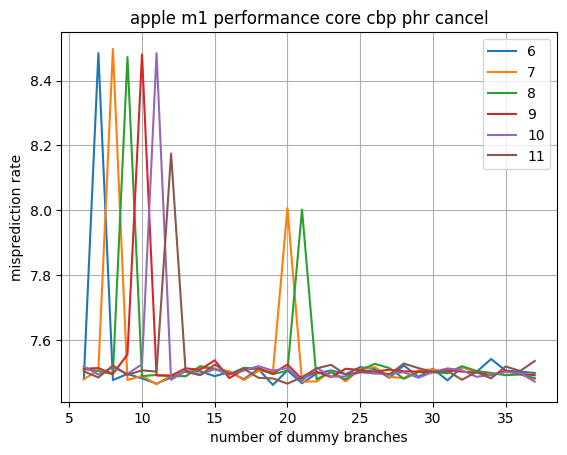

In [43]:
df[['idx'] + list(range(6,12))].plot(x='idx', xlabel='number of dummy branches', ylabel='misprediction rate', title='apple m1 performance core cbp phr cancel', grid=True)